In [ ]:
import pandas as pd
file_path = '/content/StudentsPerformance.csv'
data = pd.read_csv(file_path)
data.head(1001)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


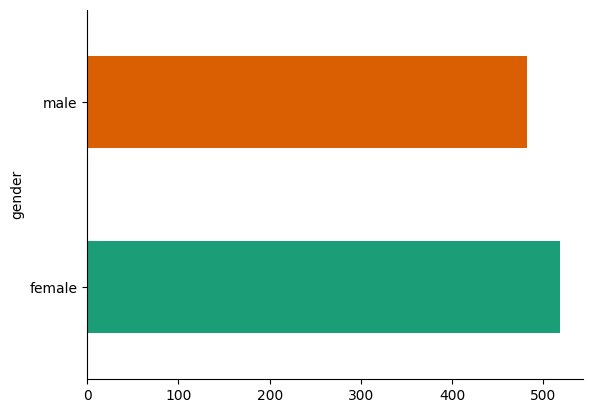

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

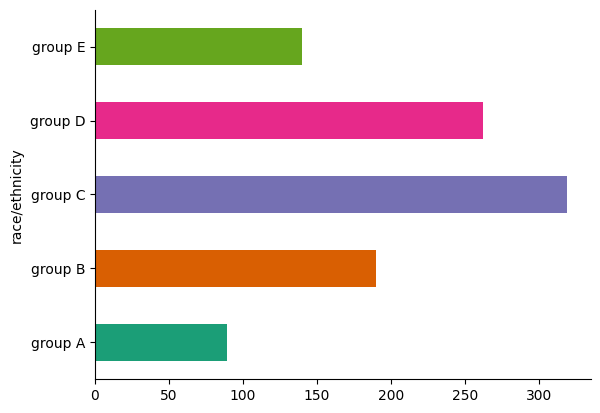

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('race/ethnicity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

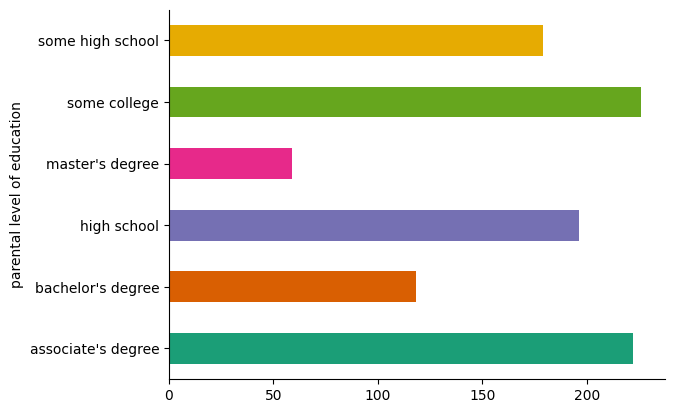

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('parental level of education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

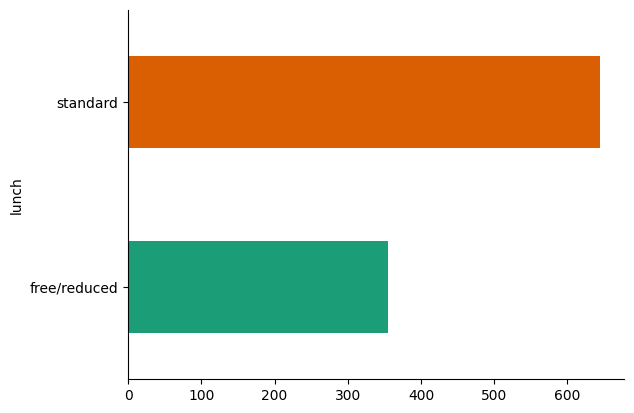

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('lunch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

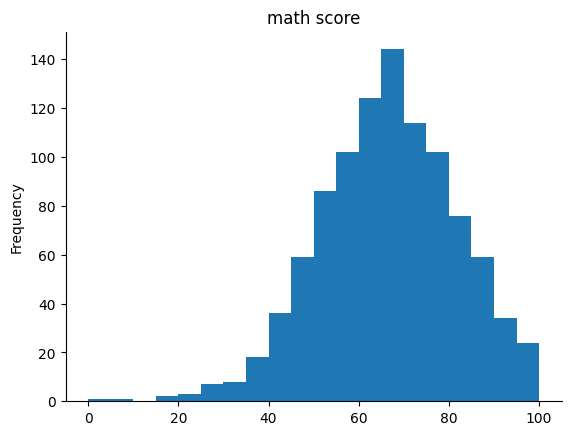

In [ ]:
from matplotlib import pyplot as plt
_df_20['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

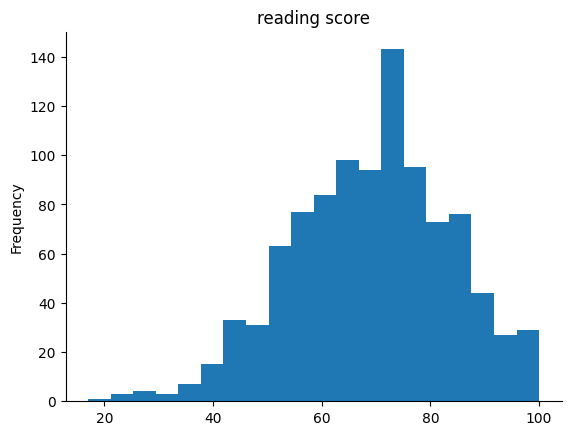

In [ ]:
from matplotlib import pyplot as plt
_df_21['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

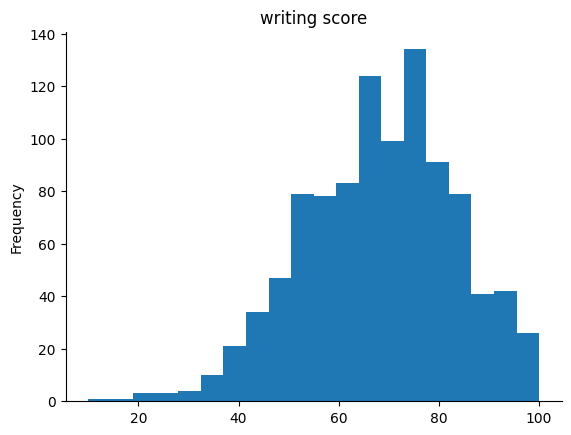

In [ ]:
from matplotlib import pyplot as plt
_df_22['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Task 2:
Association between Gender and Ethicity

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['gender'], data['race/ethnicity'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

analysis_results = {
    "Contingency Table": contingency_table,
    "Chi-square Statistic": chi2_stat,
    "Degrees of Freedom": dof,
    "P-value": p_value,
    "Expected Frequencies": pd.DataFrame(expected,
                                         index=contingency_table.index,
                                         columns=contingency_table.columns)
}

analysis_results


{'Contingency Table': race/ethnicity  group A  group B  group C  group D  group E
 gender                                                     
 female               36      104      180      129       69
 male                 53       86      139      133       71,
 'Chi-square Statistic': 9.02738626908596,
 'Degrees of Freedom': 4,
 'P-value': 0.06041858784847785,
 'Expected Frequencies': race/ethnicity  group A  group B  group C  group D  group E
 gender                                                     
 female           46.102    98.42  165.242  135.716    72.52
 male             42.898    91.58  153.758  126.284    67.48}

Conclusion:

The P-value (0.0604) is slightly above the standard significance level (0.05), suggesting that there is no strong evidence of a significant association between gender and ethnicity.
The slight difference between observed and expected frequencies might indicate some variation, but it is not statistically significant.

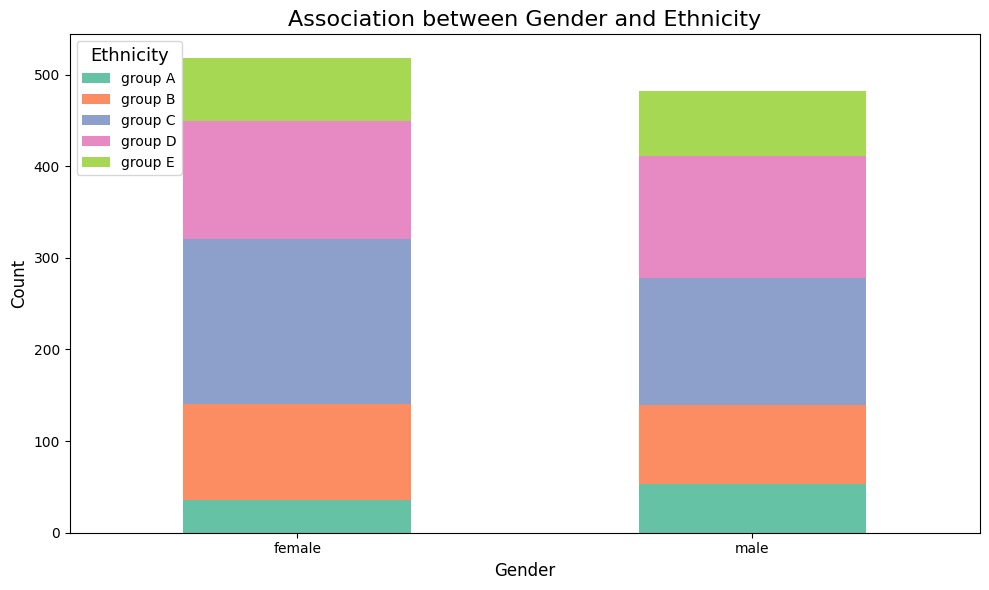

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab(data['gender'], data['race/ethnicity'])

contingency_table.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"), figsize=(10, 6))

plt.title('Association between Gender and Ethnicity', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Ethnicity', title_fontsize='13', loc='upper left')

plt.tight_layout()
plt.show()


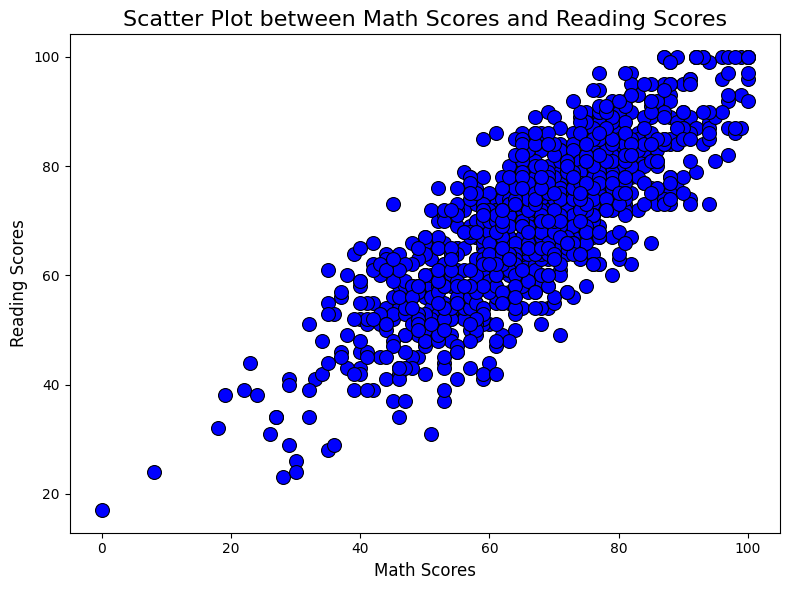

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x = data['math score']
y = data['reading score']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='blue', s=100, edgecolor='black')

plt.title('Scatter Plot between Math Scores and Reading Scores', fontsize=16)
plt.xlabel('Math Scores', fontsize=12)
plt.ylabel('Reading Scores', fontsize=12)

plt.tight_layout()
plt.show()


Covariance: Measures how two variables change together. A positive covariance indicates that as one variable increases, the other tends to increase, while a negative covariance indicates the opposite.


Correlation: Standardizes the covariance by the standard deviations of the variables, providing a measure between -1 and 1, where 1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and 0 indicates no linear relationship.

In [ ]:
math_scores = data['math score']
reading_scores = data['reading score']
covariance = math_scores.cov(reading_scores)
correlation = math_scores.corr(reading_scores)
covariance, correlation


(180.99895795795803, 0.8175796636720546)

Conclusion:

The positive covariance of 180.99 reinforces the idea of a positive relationship, but the correlation coefficient (0.818) gives you a more useful metric for understanding the strength of the relationship in a standardized way.

The correlation coefficient between Math Scores and Reading Scores is 0.818, which indicates a strong positive correlation between the two variables. Here’s what this suggests:

Positive Relationship:

As Math Scores increase, Reading Scores also tend to
increase, and vice versa. This indicates that students who perform well in Math are likely to perform well in Reading.

Strength of the Relationship:

The correlation value of 0.818 is relatively high, suggesting that the relationship is fairly strong, although not perfectly linear. It is likely that factors influencing performance in one area (like study habits or general aptitude) are also influencing the other.

Implications for Analysis:

If you're trying to predict one of these scores based on the other, the positive correlation suggests that Math Scores could be a good predictor of Reading Scores and vice versa.
This could be useful in educational research or in identifying students who might need additional support in one area based on their performance in the other.
In summary, there appears to be a strong positive relationship between Math and Reading scores in this dataset.